# Tune nmn and confidence thresholds

Takes model, data and training thresholds. Test diffrent. Return the best (and heatmap)

In [2]:
import torch
from helper_functions import *
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

Validation data has 1 sample.
All set up!
Running 220 thresholds


100%|██████████| 11/11 [00:00<00:00, 331.78it/s]

Best f1: 1.0
Best NMS Threshold: 0.0
Best Confidence Threshold: 0.05


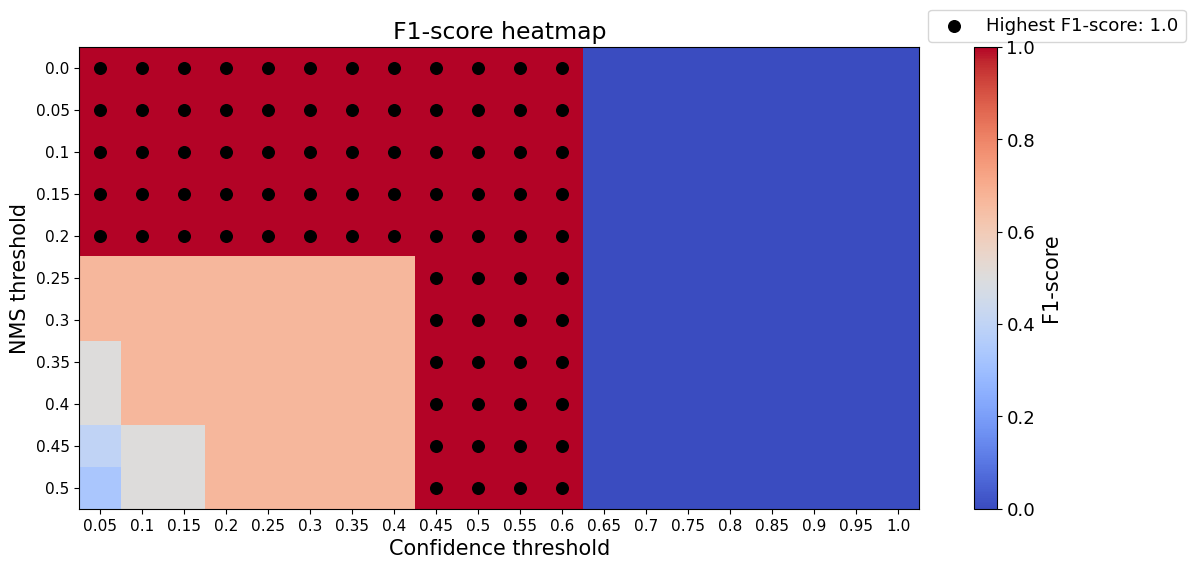

In [4]:
DATA_FOLDER = r'./fashion_v1/yolo'
CLASSES = ['bg', 'Hole', 'Stain', 'TUD']
IMG_WIDTH = 1280
IMG_HEIGHT = 720

val_dataset = FashionDataset(
    data_folder=DATA_FOLDER,
    split='val',
    width=IMG_WIDTH, height=IMG_HEIGHT,
    transform = A.Compose([
        ToTensorV2(p=1.0)
        ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']}))

print(f"Validation data has {len(val_dataset)} sample{'s' if len(val_dataset)>1 else ''}.")

val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=1, shuffle=False, num_workers=4,
    collate_fn=utils.utils.collate_fn)

def load_model(MODEL_NAME):
    # Load the trained model
    model = get_object_detection_model(num_classes=4)
    # Load best version of model (lowest val loss)
    model.load_state_dict(torch.load(f"runs/{MODEL_NAME}/best.pth")) # NOTE! best / last
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    model.to(device)
    return model

model = load_model("202404211431_FasterRCNN_960")
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

res = opt_thresholds(model, val_loader, device=device, iou_threshold=0.25)
plot_res(res, best_type="max")